### Ames Housing Project
- In the Ames Housing project, we will develop a linear regression model that will be used to predict housing prices
- Our dataset includes 81 data items associated with each house transaction.  "SalePrice" is our model's target, or independent variable, that we're building the model to ultimately predict  

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import statsmodels.formula.api as smf

#### Load data and conduct preliminary exploratory data analysis (EDA). 

In [2]:
ames = pd.read_csv('Data/ames_housing.csv')

In [3]:
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### First, we select features that we believe - based on our own experience - are likely drivers of home prices.  We create a new "slimmed down" dataframe based on these 12 features and the model's target, "SalePrice".

In [5]:
model_vars = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
              'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'YrSold', 'SalePrice']

#### "model_vars" creates a list of features that we believe are most relevant to home sales prices.  We then establish a new DataFrame - df_ames - with these features that is more "manageable" (i.e., 12 features instead of 81 in the original data set).

In [6]:
df_ames = ames[model_vars]

In [7]:
#ames.dropna()

In [8]:
df_ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
LotArea         1460 non-null int64
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
TotalBsmtSF     1460 non-null int64
1stFlrSF        1460 non-null int64
2ndFlrSF        1460 non-null int64
GrLivArea       1460 non-null int64
FullBath        1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
GarageCars      1460 non-null int64
YrSold          1460 non-null int64
SalePrice       1460 non-null int64
dtypes: int64(13)
memory usage: 148.4 KB


#### "df_ames" is now ready for more specific EDA.  In order to select the powerful features for our model, we check the features' correlations with SalePrice as well as autocorrelations/collinearity between the features.  (Note: autocorrelations among the features inform us that such features won't necessarily add predictive capability to our model.)

<IPython.core.display.Javascript object>


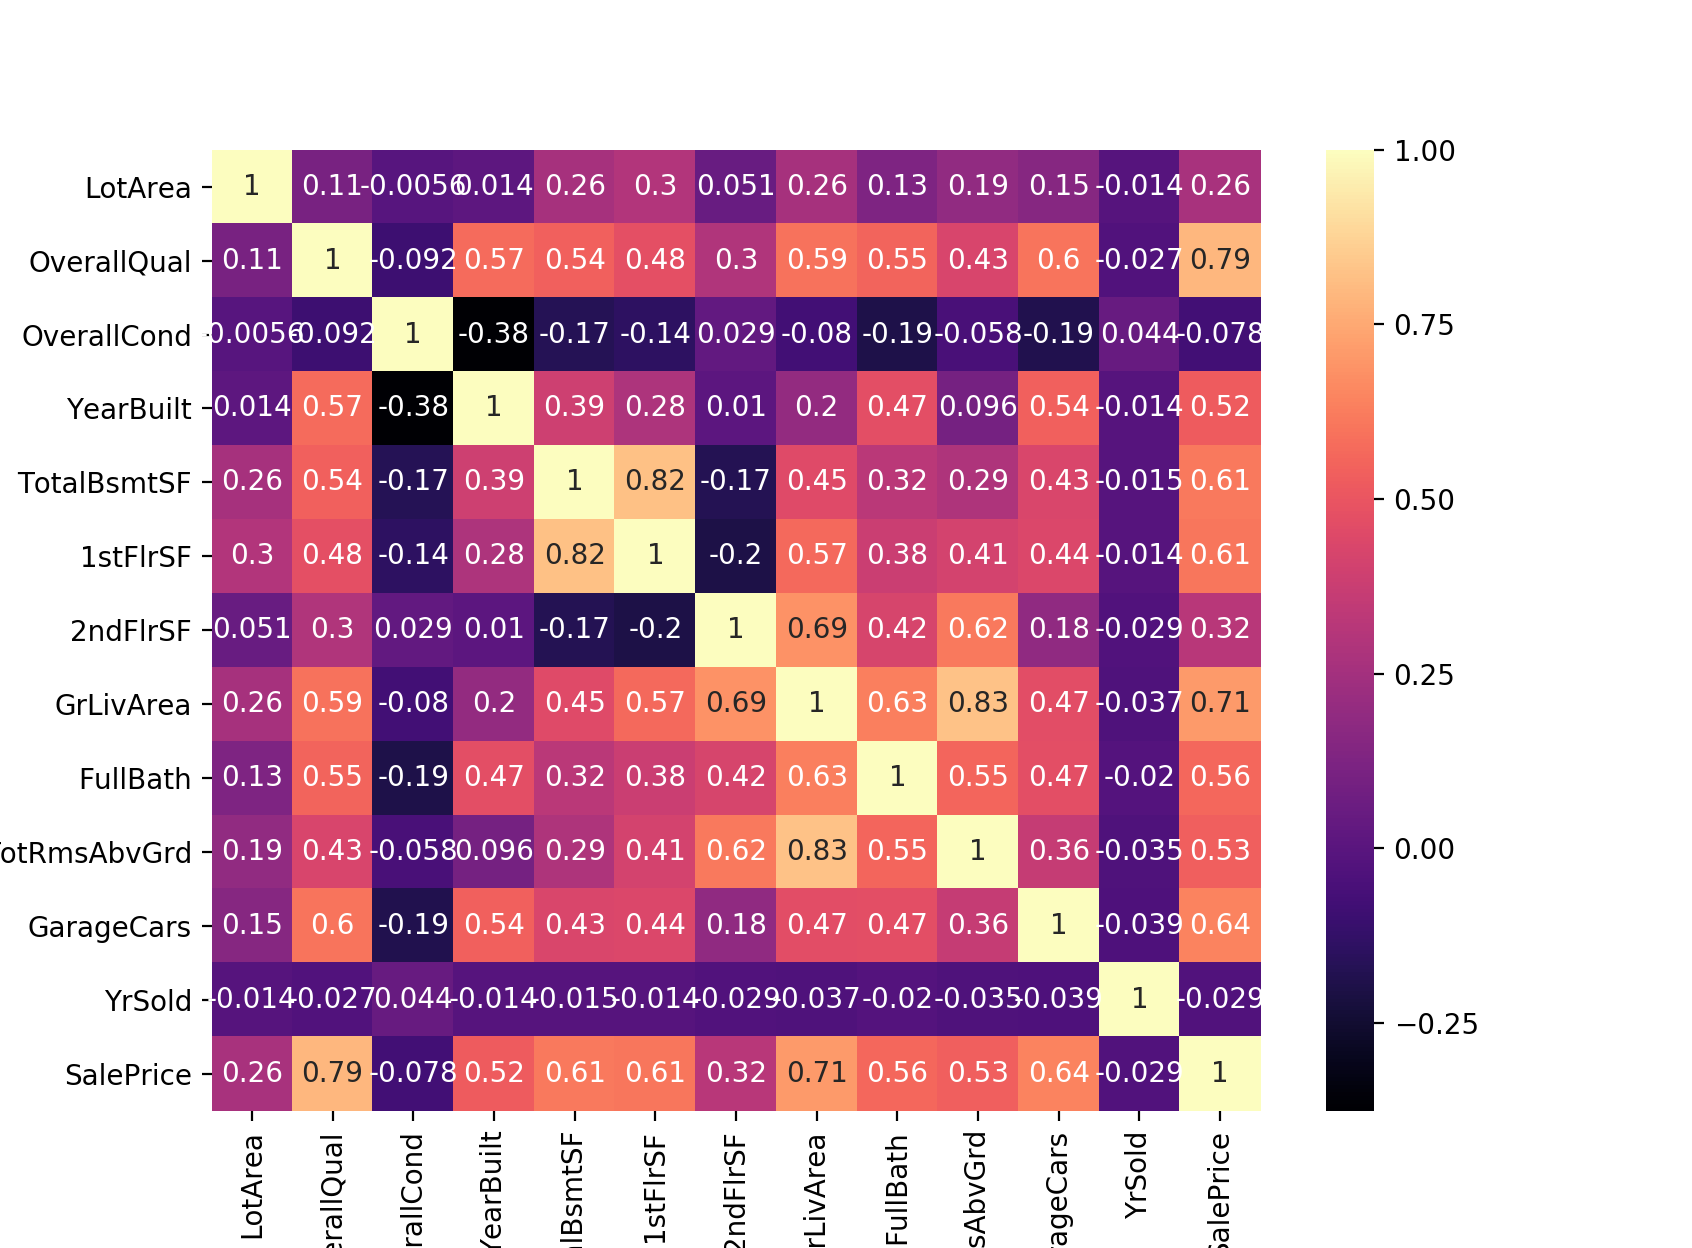

In [9]:
corr_mat = df_ames.corr()
plt.figure()
sns.heatmap(corr_mat, cmap = 'magma', annot=True)

<IPython.core.display.Javascript object>


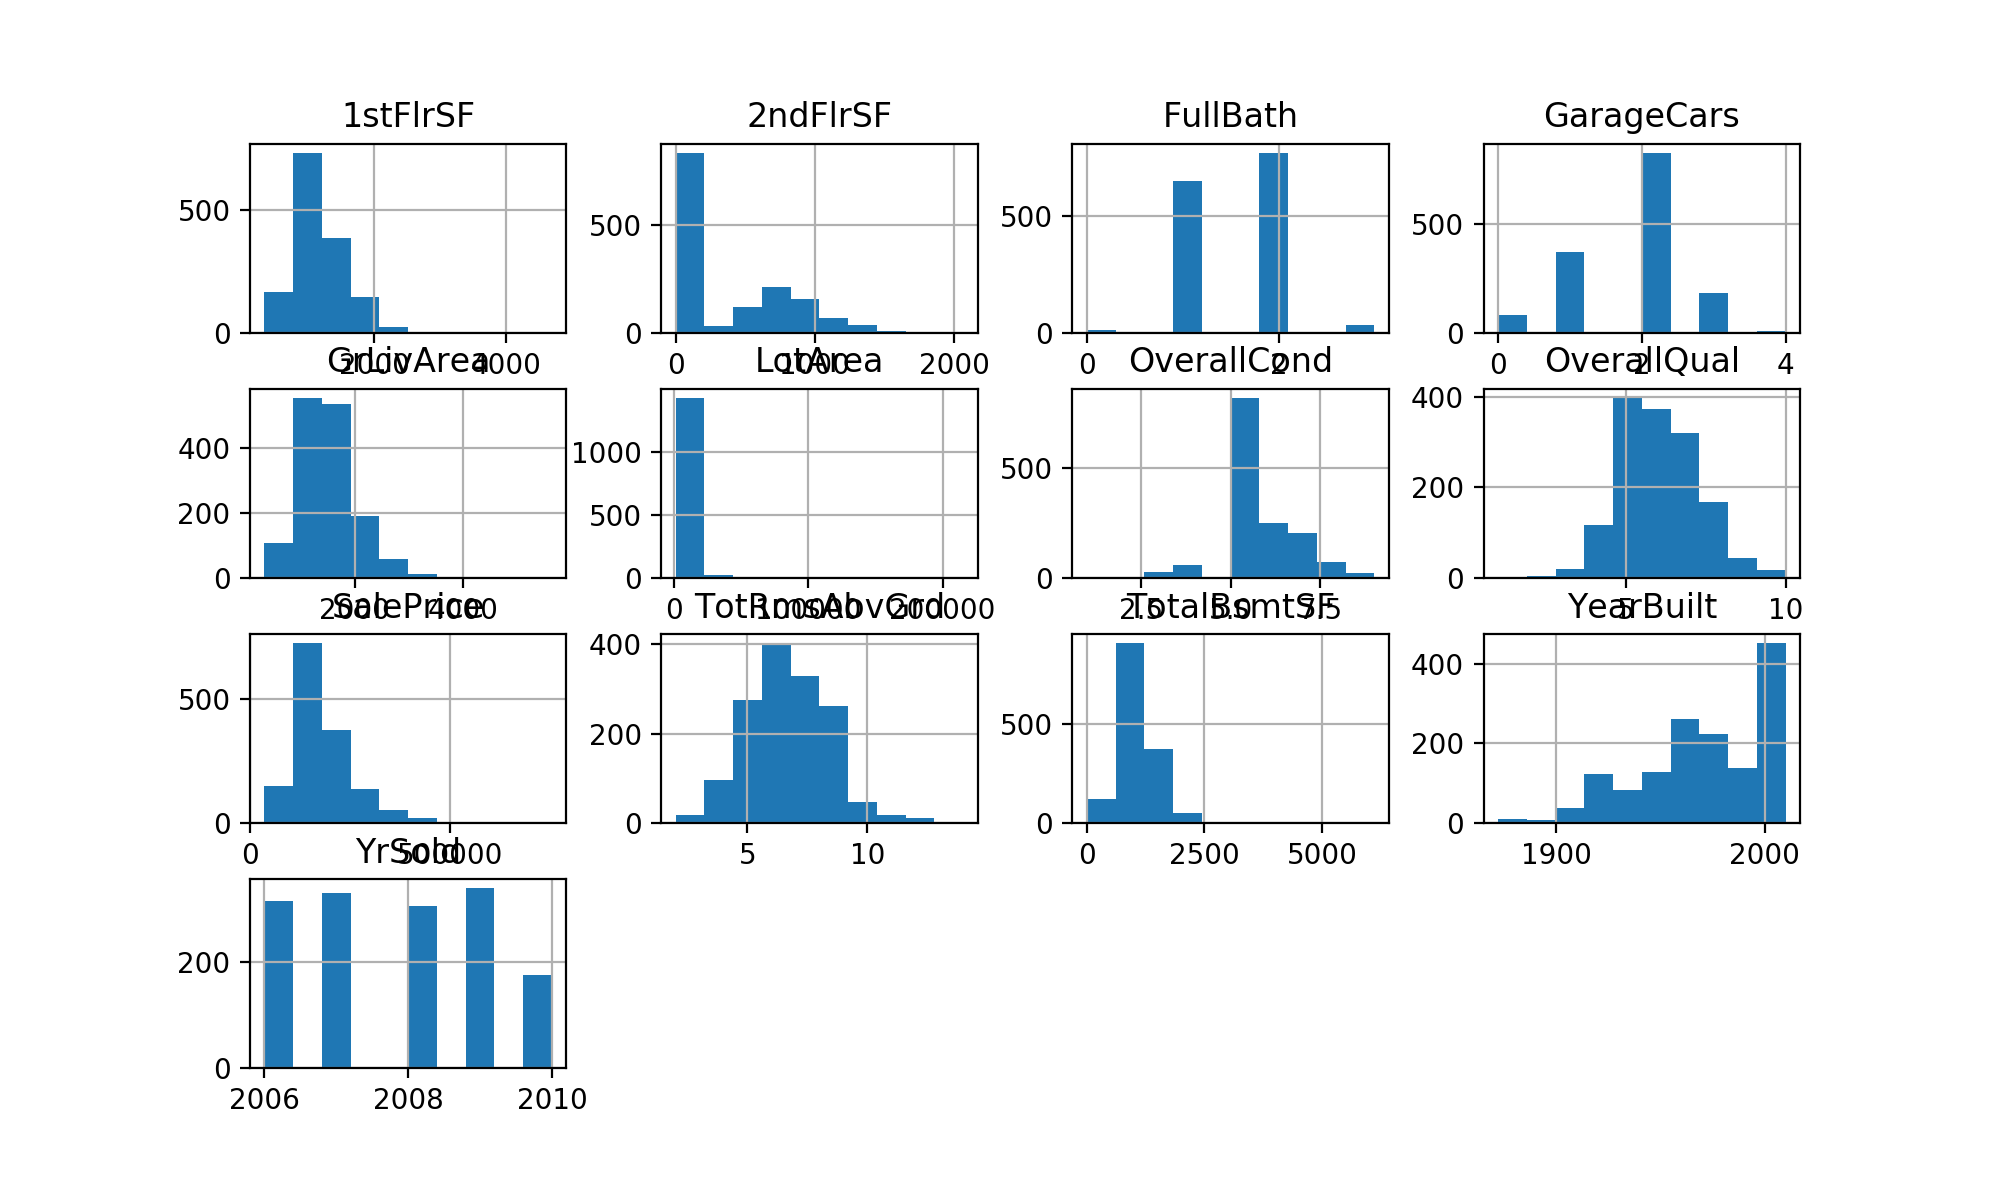

In [10]:
df_ames.hist(figsize = (10, 6));

#### OverallQual, YearBuilt, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, and GarageCars show the highest correlation with SalePrice.  We will focus on these 8 features. 

#### We also check whether the features' distributions are normally distributed, which is an assumption that must be met within a linear regression framework.

#### We include the scatter matrix, below, for informational purposes.  The scatter matrix pictorially shows the same information as the correlation matrix above. 

<IPython.core.display.Javascript object>


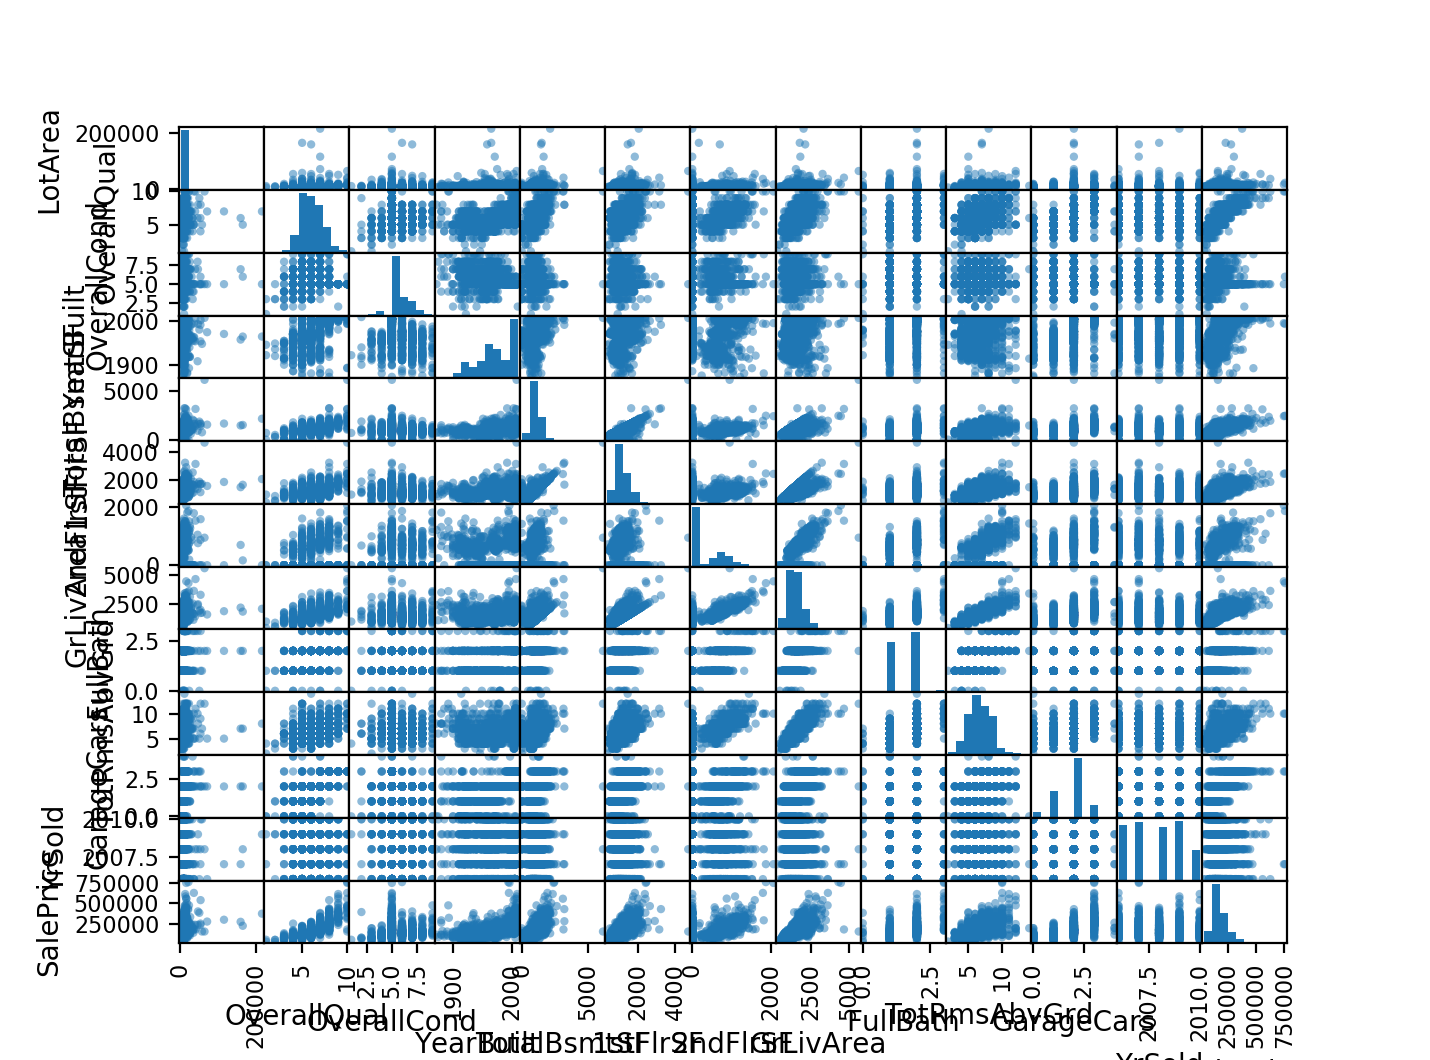

In [11]:
scatter_matrix(df_ames);

#### Now that we have selected our features and our dataset is clean, we build the linear regression model.
- Call sklearn packages (Linear Regression, train_test_split, and mean_squared_error)
- Instantiate the model and define X (target) and y (feature) variables

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [13]:
ames_lm = LinearRegression()
X = df_ames[['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars']]
y = df_ames.SalePrice

In [14]:
#train_test_split the dataset to train the model and ultimately test the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
#fit the linear regression model on the training dataset
ames_lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### The next two blocks of code show the linear model's:
- coefficient
- intercept

In [16]:
ames_lm.coef_

array([ 2.07763656e+04,  3.86790154e+02,  1.40308872e+01,  1.41961308e+01,
        4.91640346e+01, -6.23560757e+03,  3.22894003e+02,  1.55856986e+04])

In [17]:
ames_lm.intercept_

-834913.0008332623

#### Now that we have our linear regression model built, we check the model's ability to accurately predict housing prices, which is its R-squared
- Our model's R-squared on the training data is 0.758 (shown below)
- Our model's R`squared on the test data is 0.797 (shown 2 code blocks below)

In [18]:
ames_lm.score(X_train, y_train)

0.7576705862473095

In [19]:
ames_lm.score(X_test, y_test)

0.7967275188757639

#### Finally, we run our linear model to predict home sale prices, then check the results' mean-squared error (MSE) and root-mean-squared error (RMSE), which also show our model's accuracy.  RMSE is measured in the same units as the model's target, SalePrice, which is $-dollars 

In [20]:
predict = ames_lm.predict(X_test)

In [21]:
predict[:8]

array([142829.08640486, 294893.2021251 , 120141.09800043, 173934.94243873,
       289958.87863771,  54432.0829288 , 211430.78103098, 171493.49233752])

In [22]:
y_test[:8]

892     154500
1105    325000
413     115000
522     159000
1036    315500
614      75500
218     311500
1160    146000
Name: SalePrice, dtype: int64

In [23]:
mse = mean_squared_error(y_test, predict)

In [24]:
rmse = np.sqrt(mse)

In [25]:
print("MSE: ", mse, "\nRMSE: ", rmse)

MSE:  1423986552.111085 
RMSE:  37735.746343633975
